In [1]:
#samples_to_freq_spectrum_analysis_v3
#last updated 09_03_2024
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file=pd.read_csv(r'C:\rahul\rahul\NITK\Semester IV\IET_project\samples\samples_csv.csv')
file.info()
file.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample     407 non-null    float64
 1   op_cl_op1  406 non-null    float64
 2   op_cl_op2  386 non-null    float64
 3   op_cl_op3  443 non-null    float64
 4   op_cl_op4  401 non-null    float64
 5   op_cl_op5  355 non-null    float64
 6   op_cl_op6  358 non-null    float64
 7   cl_rd_cl1  407 non-null    float64
 8   cl_rd_cl2  386 non-null    float64
 9   cl_rd_cl3  405 non-null    float64
 10  cl_rd_cl4  409 non-null    float64
 11  cl_rd_cl5  332 non-null    float64
 12  cl_rd_cl6  379 non-null    float64
 13  ex_fl_ex1  341 non-null    float64
 14  ex_fl_ex2  368 non-null    float64
 15  ex_fl_ex3  376 non-null    float64
 16  ex_fl_ex4  389 non-null    float64
 17  ex_fl_ex5  355 non-null    float64
 18  ex_fl_ex6  376 non-null    float64
 19  sp_pr_sp1  762 non-null    int64  
 20  sp_pr_sp2 

,sample,op_cl_op1,op_cl_op2,op_cl_op3,op_cl_op4,op_cl_op5,op_cl_op6,cl_rd_cl1,cl_rd_cl2,cl_rd_cl3,...,sp_pr_sp3,sp_pr_sp4,sp_pr_sp5,sp_pr_sp6,pn_op_pn1,pn_op_pn2,pn_op_pn3,pn_op_pn4,pn_op_pn5,pn_op_pn6
0,1.0,2.0,50.0,57.0,391.0,2.0,382.0,13.0,19.0,37.0,...,94.0,167.0,20.0,38.0,1.0,25.0,64.0,12.0,3.0,264.0
1,2.0,199.0,23.0,23.0,52.0,36.0,22.0,25.0,18.0,189.0,...,233.0,146.0,19.0,14.0,140.0,64.0,NaN,267.0,6.0,59.0
2,3.0,203.0,23.0,23.0,52.0,40.0,24.0,31.0,17.0,225.0,...,69.0,155.0,18.0,15.0,127.0,66.0,265.0,216.0,104.0,72.0
3,4.0,210.0,19.0,21.0,49.0,35.0,25.0,28.0,18.0,218.0,...,54.0,157.0,16.0,15.0,119.0,64.0,262.0,3.0,104.0,82.0
4,5.0,201.0,18.0,23.0,49.0,36.0,22.0,28.0,23.0,222.0,...,43.0,8.0,17.0,18.0,143.0,65.0,263.0,139.0,135.0,87.0


In [2]:
file.columns

Index(['sample', 'op_cl_op1', 'op_cl_op2', 'op_cl_op3', 'op_cl_op4',
       'op_cl_op5', 'op_cl_op6', 'cl_rd_cl1', 'cl_rd_cl2', 'cl_rd_cl3',
       'cl_rd_cl4', 'cl_rd_cl5', 'cl_rd_cl6', 'ex_fl_ex1', 'ex_fl_ex2',
       'ex_fl_ex3', 'ex_fl_ex4', 'ex_fl_ex5', 'ex_fl_ex6', 'sp_pr_sp1',
       'sp_pr_sp2', 'sp_pr_sp3', 'sp_pr_sp4', 'sp_pr_sp5', 'sp_pr_sp6',
       'pn_op_pn1', 'pn_op_pn2', 'pn_op_pn3', 'pn_op_pn4', 'pn_op_pn5',
       'pn_op_pn6'],
      dtype='object')

In [3]:
samples=file.drop('sample', axis=1)

In [4]:
samples.head()

,op_cl_op1,op_cl_op2,op_cl_op3,op_cl_op4,op_cl_op5,op_cl_op6,cl_rd_cl1,cl_rd_cl2,cl_rd_cl3,cl_rd_cl4,...,sp_pr_sp3,sp_pr_sp4,sp_pr_sp5,sp_pr_sp6,pn_op_pn1,pn_op_pn2,pn_op_pn3,pn_op_pn4,pn_op_pn5,pn_op_pn6
0,2.0,50.0,57.0,391.0,2.0,382.0,13.0,19.0,37.0,44.0,...,94.0,167.0,20.0,38.0,1.0,25.0,64.0,12.0,3.0,264.0
1,199.0,23.0,23.0,52.0,36.0,22.0,25.0,18.0,189.0,3.0,...,233.0,146.0,19.0,14.0,140.0,64.0,NaN,267.0,6.0,59.0
2,203.0,23.0,23.0,52.0,40.0,24.0,31.0,17.0,225.0,243.0,...,69.0,155.0,18.0,15.0,127.0,66.0,265.0,216.0,104.0,72.0
3,210.0,19.0,21.0,49.0,35.0,25.0,28.0,18.0,218.0,249.0,...,54.0,157.0,16.0,15.0,119.0,64.0,262.0,3.0,104.0,82.0
4,201.0,18.0,23.0,49.0,36.0,22.0,28.0,23.0,222.0,232.0,...,43.0,8.0,17.0,18.0,143.0,65.0,263.0,139.0,135.0,87.0


In [5]:
for col in samples.columns:
    samples[col]=samples[col]*5.0/1024

In [6]:
samples.head()

,op_cl_op1,op_cl_op2,op_cl_op3,op_cl_op4,op_cl_op5,op_cl_op6,cl_rd_cl1,cl_rd_cl2,cl_rd_cl3,cl_rd_cl4,...,sp_pr_sp3,sp_pr_sp4,sp_pr_sp5,sp_pr_sp6,pn_op_pn1,pn_op_pn2,pn_op_pn3,pn_op_pn4,pn_op_pn5,pn_op_pn6
0,0.009766,0.244141,0.278320,1.909180,0.009766,1.865234,0.063477,0.092773,0.180664,0.214844,...,0.458984,0.815430,0.097656,0.185547,0.004883,0.122070,0.312500,0.058594,0.014648,1.289062
1,0.971680,0.112305,0.112305,0.253906,0.175781,0.107422,0.122070,0.087891,0.922852,0.014648,...,1.137695,0.712891,0.092773,0.068359,0.683594,0.312500,NaN,1.303711,0.029297,0.288086
2,0.991211,0.112305,0.112305,0.253906,0.195312,0.117188,0.151367,0.083008,1.098633,1.186523,...,0.336914,0.756836,0.087891,0.073242,0.620117,0.322266,1.293945,1.054688,0.507812,0.351562
3,1.025391,0.092773,0.102539,0.239258,0.170898,0.122070,0.136719,0.087891,1.064453,1.215820,...,0.263672,0.766602,0.078125,0.073242,0.581055,0.312500,1.279297,0.014648,0.507812,0.400391
4,0.981445,0.087891,0.112305,0.239258,0.175781,0.107422,0.136719,0.112305,1.083984,1.132812,...,0.209961,0.039062,0.083008,0.087891,0.698242,0.317383,1.284180,0.678711,0.659180,0.424805


In [7]:
samples['cl_rd_cl6']

0      0.078125
1      0.009766
2      0.161133
3      0.195312
4      0.175781
         ...   
757         NaN
758         NaN
759         NaN
760         NaN
761         NaN
Name: cl_rd_cl6, Length: 762, dtype: float64

In [8]:
%matplotlib notebook

pi=np.pi
def DTFT(N):
    w=np.zeros((N,N),dtype=np.complex_)
    for k in range(N):
        for n in range(N):
            w[k][n]=np.exp(-1j*2*pi/N*n*k)
    return w

def IDTFT(N):
    w=np.zeros((N,N),dtype=np.complex_)
    for k in range(N):
        for n in range(N):
            w[k][n]=np.exp(1j*2*pi/N*n*k)
    return w/N

In [9]:
hz=np.arange(1,121,1)
len(hz)

sample_legend={1:'op_cl_op',2:'cl_rd_cl',3:'ex_fl_ex',4:'sp_pr_sp',5:'pn_op_pn'}


In [10]:
A=np.zeros((5,6,240),dtype=np.complex_)
for k in range(1,6,1):
    sample_label=sample_legend[k]
    for i in range(1,7,1):
        col_i=sample_label+str(i)
        A[k-1][i-1]=np.matmul(DTFT(240),samples[col_i][100:340])

<IPython.core.display.Javascript object>


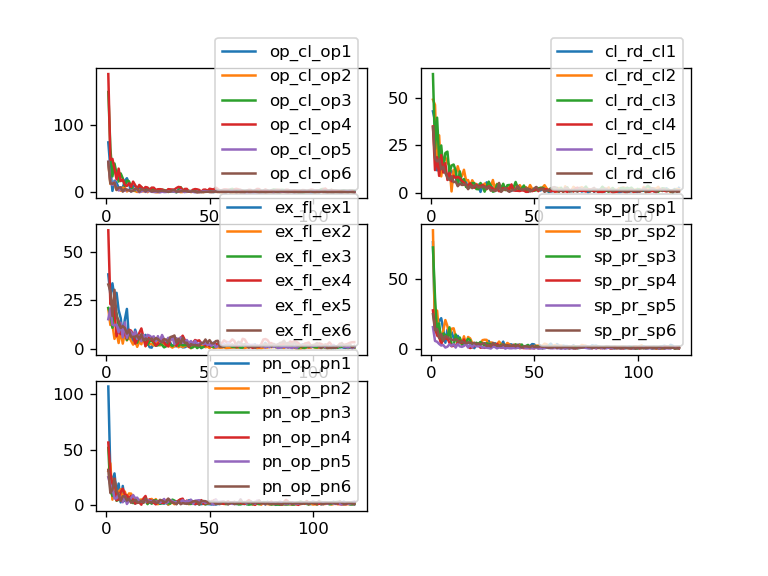

In [11]:
plt.figure(5)   				#plots for same gesture different people
for k in range(5):
    sample_label=sample_legend[k+1]
    plt.subplot(3,2,k+1)
    #print(sample_label)
    for i in range(6):
        #print(i)        
        plt.plot(hz,2*np.abs(A[k][i][1:121]),label=sample_label+str(i+1))
        plt.legend() 


<IPython.core.display.Javascript object>


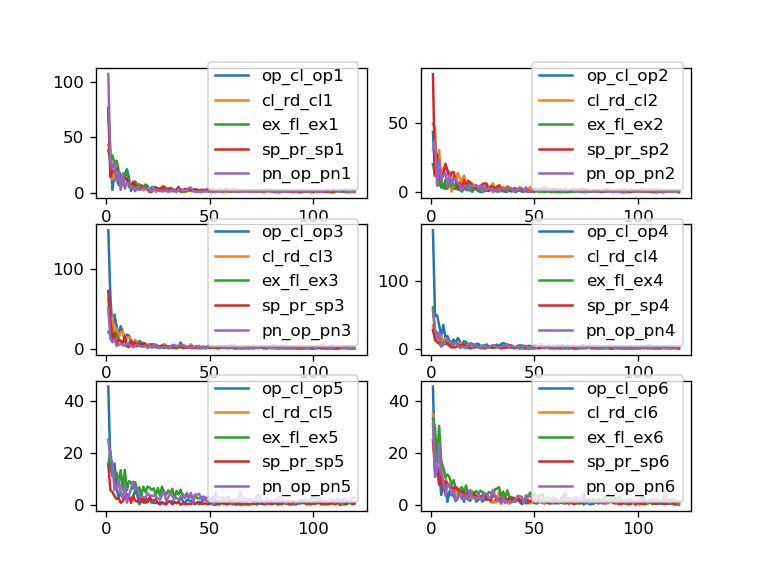

In [12]:
plt.figure(6)					#plots for different gesture same people
for i in range(6):    
    plt.subplot(3,2,i+1)
    #print(i)
    for k in range(5):
        #print(sample_label)
        sample_label=sample_legend[k+1]
        plt.plot(hz,2*np.abs(A[k][i][1:121]),label=sample_label+str(i+1))
        plt.legend()

In [13]:
A.shape
A

array([[[ 71.98242188 +0.j        , -37.04425481 -1.10189699j,
          17.8131937  +2.10400332j, ...,  -0.35902488 -1.09186611j,
          17.8131937  -2.10400332j, -37.04425481 +1.10189699j],
        [ 75.859375   +0.j        , -19.30677865 -9.87840733j,
           4.05177321 +4.76906976j, ...,  -2.05368014 -6.55564108j,
           4.05177321 -4.76906976j, -19.30677865 +9.87840733j],
        [160.08789062 +0.j        , -46.88900515+57.78027854j,
          -3.30229856-32.91745953j, ...,  -8.00129743 -8.77125217j,
          -3.30229856+32.91745953j, -46.88900515-57.78027854j],
        [208.53027344 +0.j        , -87.18195689 -9.37393719j,
          19.05201653+14.86594434j, ...,  22.69781547+10.11146173j,
          19.05201653-14.86594434j, -87.18195689 +9.37393719j],
        [ 56.09375    +0.j        , -18.59815654-12.97989265j,
           0.47936874 +7.72366942j, ...,  -2.20113708 -5.02655591j,
           0.47936874 -7.72366942j, -18.59815654+12.97989265j],
        [ 64.24804688 +0.

In [14]:
D=np.abs(A)
D

array([[[ 71.98242188,  37.06063938,  17.93702037, ...,   1.1493783 ,
          17.93702037,  37.06063938],
        [ 75.859375  ,  21.68719975,   6.25786645, ...,   6.86979127,
           6.25786645,  21.68719975],
        [160.08789062,  74.41195732,  33.08268909, ...,  11.87247342,
          33.08268909,  74.41195732],
        [208.53027344,  87.68445875,  24.16558783, ...,  24.84818878,
          24.16558783,  87.68445875],
        [ 56.09375   ,  22.67970546,   7.73853111, ...,   5.48737357,
           7.73853111,  22.67970546],
        [ 64.24804688,  22.7004707 ,   6.63626165, ...,   6.46013371,
           6.63626165,  22.7004707 ]],

       [[109.82910156,  21.54958008,  18.9675252 , ...,   5.89869097,
          18.9675252 ,  21.54958008],
        [134.28710938,  24.65225721,  23.26698629, ...,   7.25950737,
          23.26698629,  24.65225721],
        [156.00585938,  31.43219107,  11.52687248, ...,  19.87098758,
          11.52687248,  31.43219107],
        [ 97.01660156,  17

In [15]:
E=D.reshape(30,240)
E[6:12]

array([[109.82910156,  21.54958008,  18.9675252 , ...,   5.89869097,
         18.9675252 ,  21.54958008],
       [134.28710938,  24.65225721,  23.26698629, ...,   7.25950737,
         23.26698629,  24.65225721],
       [156.00585938,  31.43219107,  11.52687248, ...,  19.87098758,
         11.52687248,  31.43219107],
       [ 97.01660156,  17.55404076,   5.95875844, ...,   9.38056987,
          5.95875844,  17.55404076],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [ 77.20214844,  17.3878843 ,   9.12595625, ...,   8.26485449,
          9.12595625,  17.3878843 ]])

In [16]:
#B=np.zeros((5,240,6),dtype=np.complex_)
#for i in range(5):
#    B[i]=A[i].transpose()
#B
F=E.transpose()
F

array([[ 71.98242188,  75.859375  , 160.08789062, ..., 165.55664062,
        109.81445312, 135.29785156],
       [ 37.06063938,  21.68719975,  74.41195732, ...,  28.15136596,
         12.49330748,  15.74763105],
       [ 17.93702037,   6.25786645,  33.08268909, ...,  14.82721801,
          8.91182317,   5.36955562],
       ...,
       [  1.1493783 ,   6.86979127,  11.87247342, ...,   7.76628889,
          8.01404735,   6.86920983],
       [ 17.93702037,   6.25786645,  33.08268909, ...,  14.82721801,
          8.91182317,   5.36955562],
       [ 37.06063938,  21.68719975,  74.41195732, ...,  28.15136596,
         12.49330748,  15.74763105]])

In [17]:
C=np.abs(B)
a,b,c,d,e=C[0],C[1],C[2],C[3],C[4]
a.shape
l=[a,b,c,d,e]

NameError: name 'B' is not defined

In [18]:
data=pd.DataFrame(F)
#for i in range(5):
#    temp=pd.DataFrame()
#    temp.head()
    #data.append(temp.columns)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       240 non-null    float64
 1   1       240 non-null    float64
 2   2       240 non-null    float64
 3   3       240 non-null    float64
 4   4       240 non-null    float64
 5   5       240 non-null    float64
 6   6       240 non-null    float64
 7   7       240 non-null    float64
 8   8       240 non-null    float64
 9   9       240 non-null    float64
 10  10      0 non-null      float64
 11  11      240 non-null    float64
 12  12      240 non-null    float64
 13  13      240 non-null    float64
 14  14      240 non-null    float64
 15  15      240 non-null    float64
 16  16      240 non-null    float64
 17  17      240 non-null    float64
 18  18      240 non-null    float64
 19  19      240 non-null    float64
 20  20      240 non-null    float64
 21  21      240 non-null    float64
 22  22

In [19]:
data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,71.982422,75.859375,160.087891,208.530273,56.093750,64.248047,109.829102,134.287109,156.005859,97.016602,...,230.634766,138.647461,42.978516,54.707031,123.740234,96.201172,146.440430,165.556641,109.814453,135.297852
1,37.060639,21.687200,74.411957,87.684459,22.679705,22.700471,21.549580,24.652257,31.432191,17.554041,...,36.311626,13.750873,7.737649,12.408973,53.444044,15.369573,25.732492,28.151366,12.493307,15.747631
2,17.937020,6.257866,33.082689,24.165588,7.738531,6.636262,18.967525,23.266986,11.526872,5.958758,...,18.279242,7.285247,2.805163,6.610454,13.991179,18.824281,6.535212,14.827218,8.911823,5.369556
3,1.149378,6.869791,11.872473,24.848189,5.487374,6.460134,5.898691,7.259507,19.870988,9.380570,...,5.808847,4.698106,2.487808,7.070789,10.913481,2.387691,4.056263,7.766289,8.014047,6.869210
4,8.672890,6.109959,21.443975,17.298508,7.954194,7.230164,8.171840,15.185534,8.820709,4.422418,...,9.104587,4.232990,1.712943,3.834546,14.224643,11.618064,5.880542,11.825051,2.884985,11.700223
5,7.175745,1.776679,14.124549,9.664254,3.317685,1.890492,6.102058,4.293746,12.496495,9.946559,...,2.665532,1.582175,1.139363,5.232286,5.122614,4.651385,1.873446,2.076542,2.953540,6.270612
6,3.388095,2.966246,8.068626,17.642300,1.462483,3.569938,7.835633,8.570649,6.543297,5.308307,...,5.456799,3.472903,1.313796,2.805732,9.667421,5.958834,2.362765,2.671224,5.023991,4.629710
7,3.620293,1.239602,14.112193,8.421950,2.375024,3.715797,5.325341,9.334491,10.497363,7.783056,...,4.887093,3.630983,0.419903,4.533186,1.164347,7.117836,3.195052,5.882560,2.163868,1.797556
8,3.507729,3.540910,10.442393,9.400841,1.530923,0.575056,4.288395,7.907314,10.853303,3.336759,...,3.580683,3.717067,0.722515,4.138269,8.563436,2.402619,2.145771,7.324582,1.216154,3.904612
9,8.622306,3.552432,4.824432,5.681136,1.209265,2.634058,5.510057,7.193049,5.165780,5.215859,...,7.676833,2.069957,1.571511,3.579011,1.759844,6.058156,1.979726,4.721104,3.856056,3.854369


In [ ]:
data.info()

In [ ]:
x=data.drop(10,axis=1)
x.head()

In [ ]:
data1=x.transpose()
data1.head()

In [ ]:
data1['ges']=[1,1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4,5,5,5,5,5,5]
data1.head(12)

In [ ]:
data1.to_csv(r'C:\rahul\rahul\NITK\Semester IV\IET_project\samples\ml_inp.csv',index=False)